<h1>Is it orange or grapefruit?</h1>

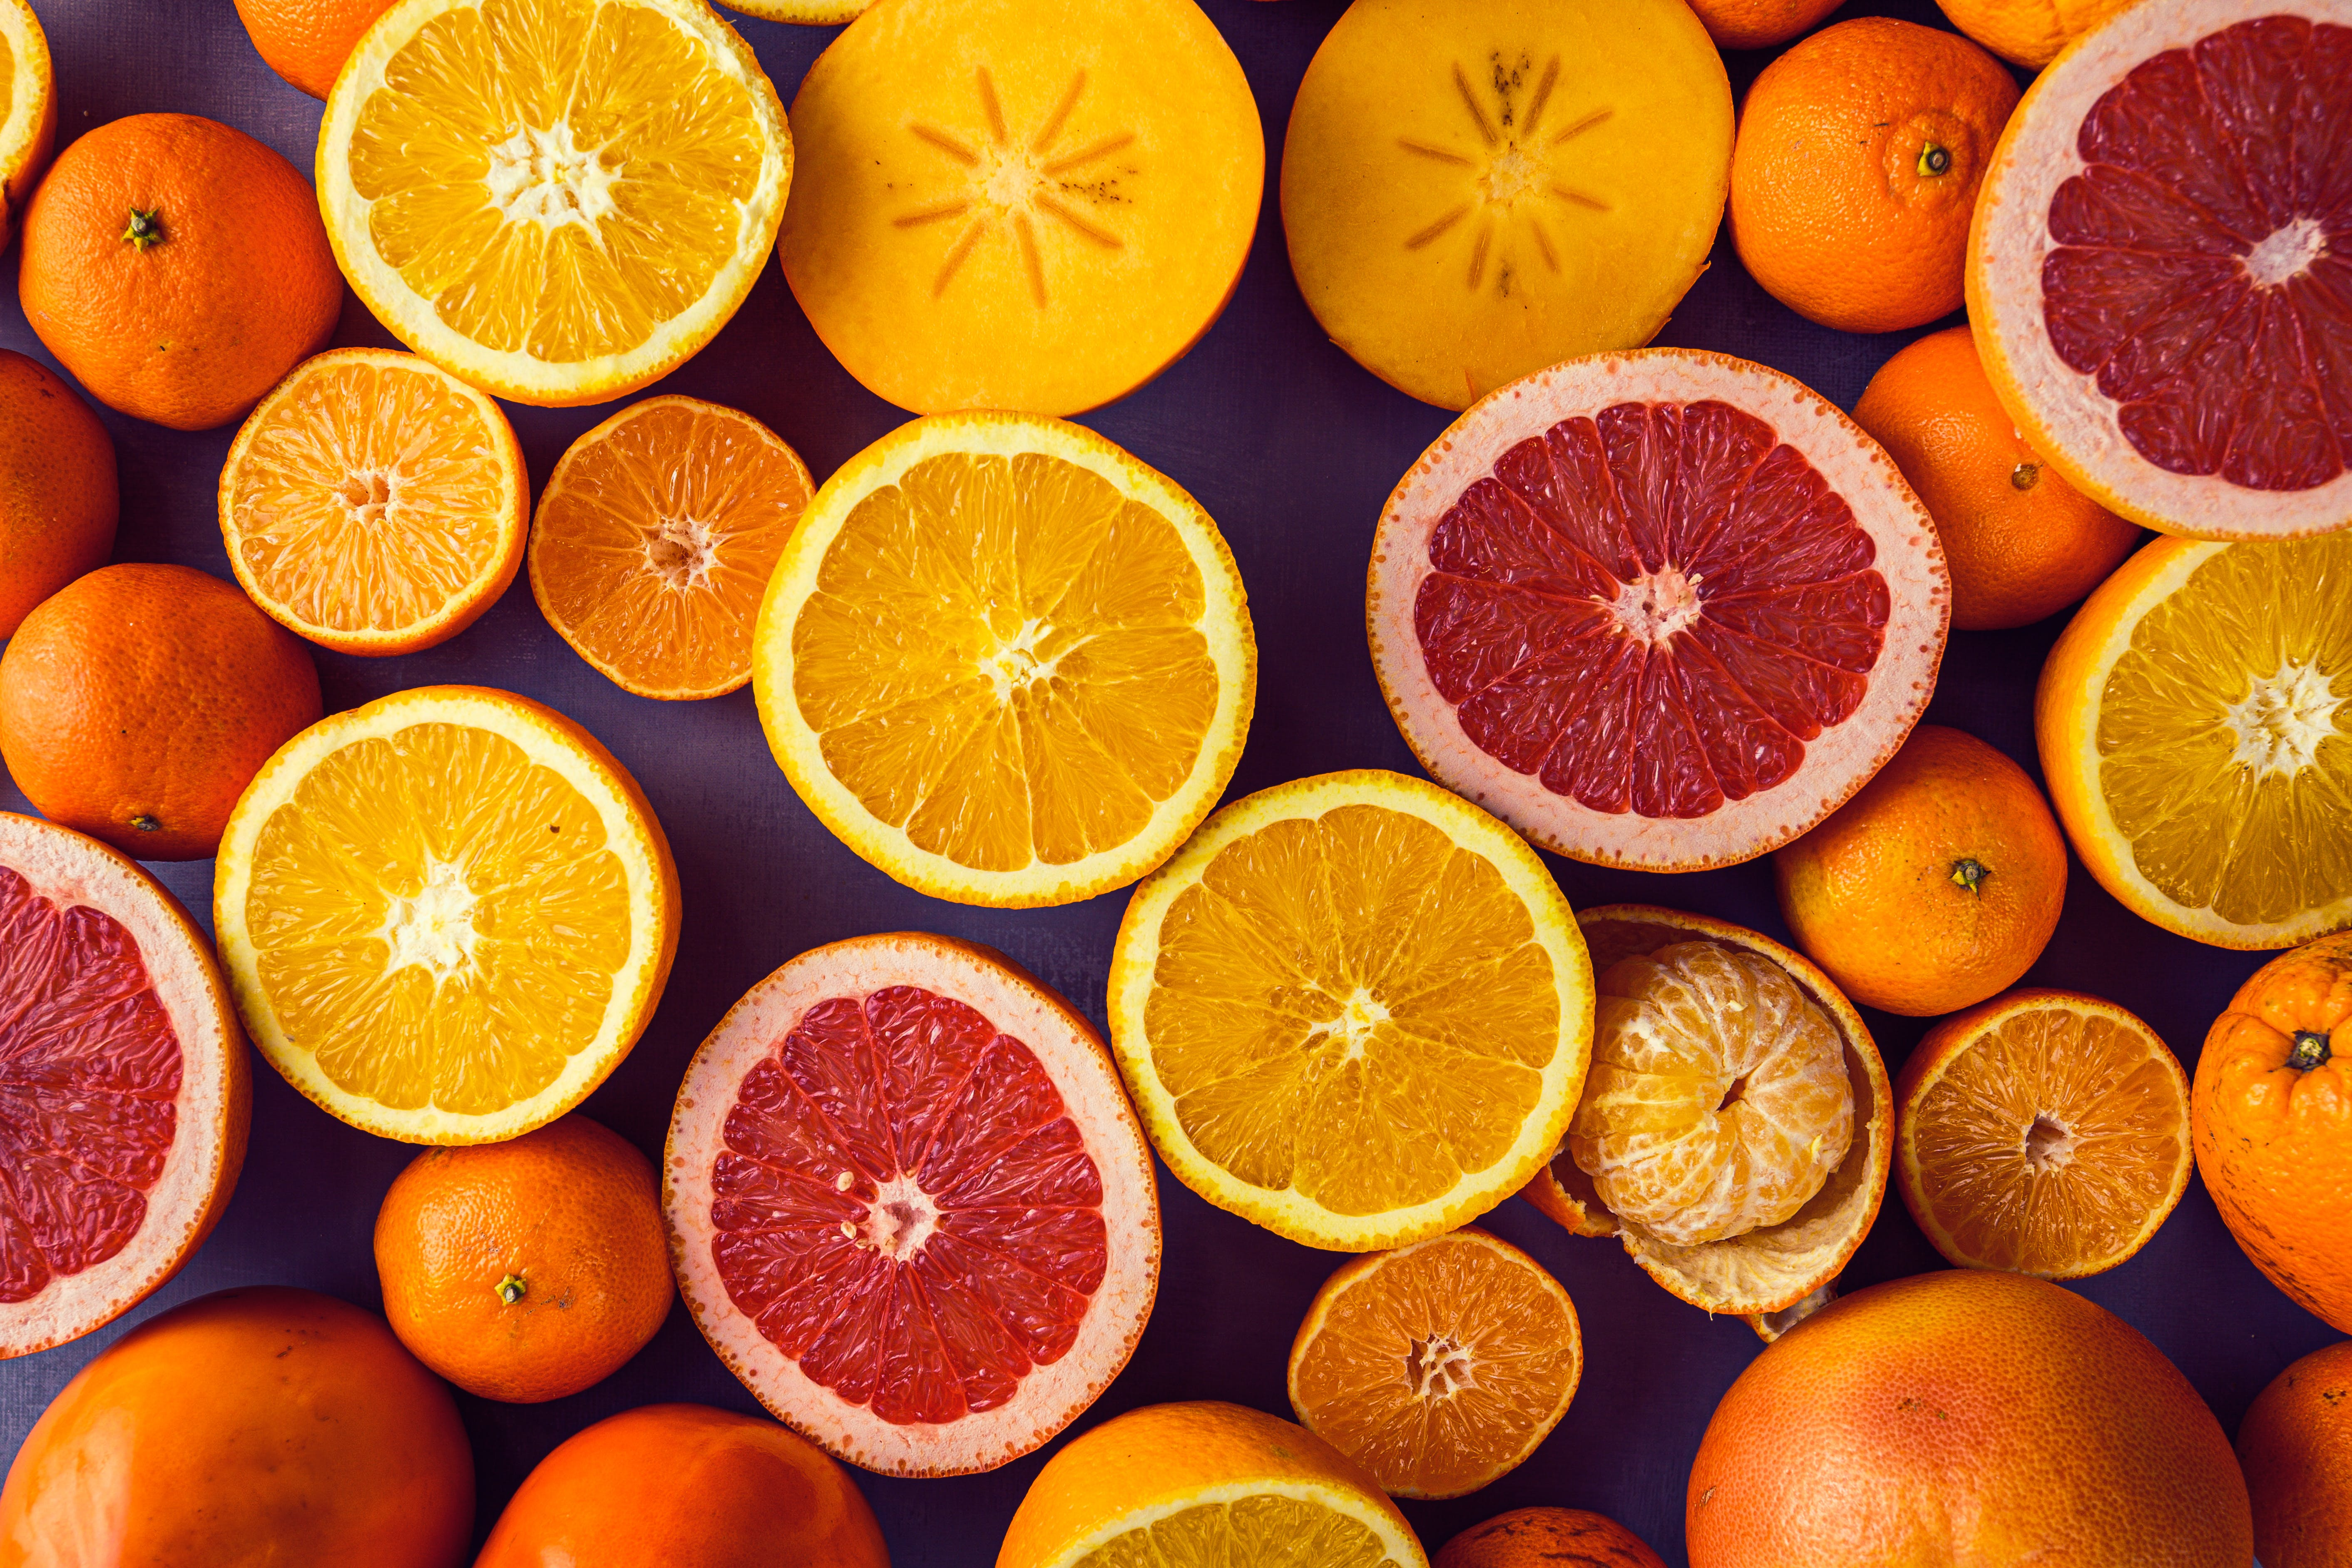

In [1]:
#%matplotlib inline
import requests
import IPython.display as Disp
url = 'https://images.pexels.com/photos/10343578/pexels-photo-10343578.jpeg'
Disp.Image(requests.get(url).content, width=800)

<h2>Table of Contents</h2> 

* [I. About the Project](#chapter1)<br>
* [II. Importing Libraries](#chapter2)<br>
* [III. Exploratory Data Analysis](#chapter3)<br>
* [IV. Building the Models](#chapter4)<br>
    * [0. Naive Bayes](#sec4_0)<br>
    * [1. Logistic Regression](#sec4_1)<br>
    * [2. Support Vector Machines](#sec4_2)<br>
    * [3. Linear Support Vector Machines](#sec4_3)<br>
    * [4. Stochastic Gradient Descent](#sec4_4)<br>
    * [5. K-Nearest Neighbors](#sec4_5)<br>
    * [6. Decision Tree](#sec4_6)<br>
    * [7. Random Forest](#sec4_7)<br>
    * [8. Gradient Boost](#sec4_8)<br>
    * [Model summary](#sec4_9)<br>
* [V. Final Report](#chapter5)<br>
* [Supplement](#chapter6)<br>



<a class="anchor"  id="chapter1"></a>
# I. About the Project 

<p>There are a lot of Data Science projects. Some of them try to answer the question, is it worth to build high speed train railway, the others try to bring space travel closer. This project focuses on the size of a grapefruit and color of an orange.</p>


<p>The goal is to build the model which will decide if specific fruit is an orange or a grapefruit. This work will be based on Orange vs Grapefruit Dataset from Kaggle. Firstly, I will perform Exploratory Data Analysis. Then, I will create some models and choose the best one.</p>

<a class="anchor"  id="chapter2"></a>
# II. Importing Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.simplefilter(action='ignore')



<a class="anchor"  id="chapter3"></a>
# III. Exploratory Data Analysis 

In [3]:
df = pd.read_csv('/kaggle/input/oranges-vs-grapefruit/citrus.csv')
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
df.shape

(10000, 6)

The dataset consists of 10000 rows and 6 columns. The feature 'name' is the target. The rest of data will be treated as independent variables. 

In [5]:
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [6]:
df.duplicated().sum()

0

This dataset is clean. There are no missing values and duplicates.

In [7]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


The weight and diameter can take on different values. In the dataset we have small fruits as well as quite huge ones. 

Next three columns inform us what is the level of intensity of a specific color, using RGB color model. The bigger value of component, the more specific color occurs on the fruit. Three zeros refers to black, and three 255s is a white color. 

Red color takes on middle values - between 115 and 192. Interquartile range is included between 147 and 161. 

For green, the values are much smaller than for red. On average, twice. 

The participation of blue color in the fruits can be considered as vestigial. The 75'th percentile is equal to 17.

To get better understanding of the dataset, let's see the distribution of all the variables for oranges and grapefruits.

To do so, let's create two new DataFrames:

<b>df_o</b> - part of df consisting of oranges only <br>
<b>df_g</b> - part of df consisting of grapefruits only

In [8]:
df_o = df[df['name']=='orange']
df_g = df[df['name']=='grapefruit']

In [9]:
df_o.describe()

,diameter,weight,red,green,blue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8.474424,152.804920,156.832800,81.988200,7.115200
std,1.260665,18.669021,9.890258,10.090789,6.493779
min,2.960000,86.760000,123.000000,49.000000,2.000000
25%,7.650000,140.147500,150.000000,75.000000,2.000000
50%,8.470000,152.665000,157.000000,82.000000,4.000000
75%,9.300000,165.430000,163.000000,89.000000,11.000000
max,12.870000,231.090000,192.000000,116.000000,38.000000


In [10]:
df_g.describe()

,diameter,weight,red,green,blue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,11.476946,197.296664,150.862800,70.033000,15.611200
std,1.221148,19.193190,10.103148,10.044924,9.271592
min,7.630000,126.790000,115.000000,31.000000,2.000000
25%,10.660000,184.350000,144.000000,63.000000,8.000000
50%,11.450000,197.430000,151.000000,70.000000,15.000000
75%,12.320000,210.165000,158.000000,77.000000,22.000000
max,16.450000,261.510000,187.000000,103.000000,56.000000


Both groups have the same number of occurrences (5000 times)

<b>Diameter</b><br>
Grapefruits reach larger sizes. The smallest orange has the diameter equal to 2,96cm and the smallest grapefruit has 7,63cm. On average, the difference is equal to ca. 3cm.

<b>Weight</b><br>
Similarly to diameter, oranges are characterized by lower values than grapefruits. On average, orange weighs 152g, while the grapefruit 197g. We can suppose, that diameter and weight are correlated to each other.

<b>Red</b><br>
The participation of red color in both groups is similar. There is slightly more red in oranges. Probably, this variable won't be a good predictor.

<b>Green</b><br>
Comparing to red, the differences are a bit higher. There is more green color in oranges than in grapefruits.

<b>Blue</b><br>
Here, the differences are the biggest. In oranges the blue variable takes on 7,11 on average, while in grapefruits there is more than twice as much blue color (15,61). Despite the small participation of this color in the fruits, it can be a good predictor.


<b>Intuition</b><br>
After this short analysis, having the group of oranges and grapefruits, the grapefruits will be characterized by:
- bigger diameter
- greater mass
- more blue color

The thoughts above represented by histograms.

Text(0.5, 1.0, 'Blue')

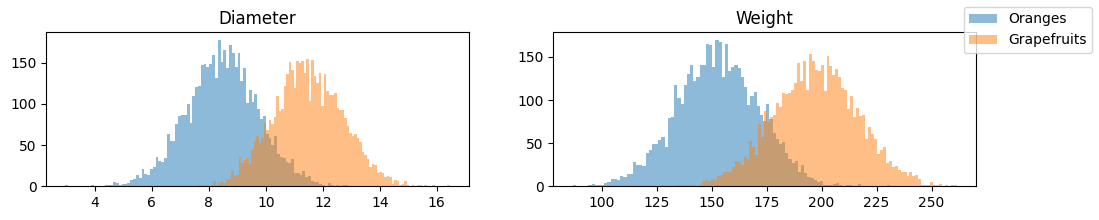

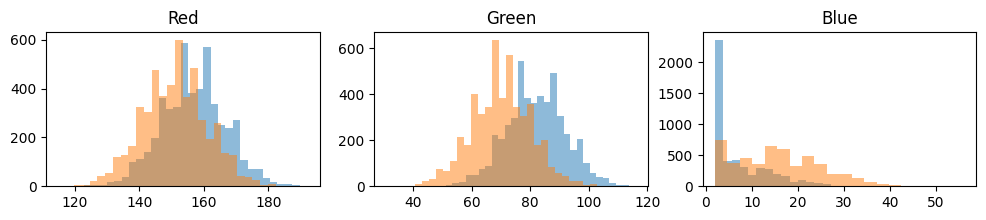

In [11]:
fig, (ax11, ax12) = plt.subplots(1, 2, figsize=(12, 2))



ax11.hist(df_o['diameter'], bins=100, alpha=0.5, label="Oranges")
ax11.hist(df_g['diameter'], bins=100, alpha=0.5, label="Grapefruits")
ax11.set_title('Diameter')

ax12.hist(df_o['weight'], bins=100, alpha=0.5, label="Oranges")
ax12.hist(df_g['weight'], bins=100, alpha=0.5, label="Grapefruits")
ax12.set_title('Weight')
handles, labels = ax11.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')


fig, (ax21, ax22, ax23) = plt.subplots(1, 3, figsize=(12, 2))
ax21.hist(df_o['red'], bins=30, alpha=0.5, label="Oranges")
ax21.hist(df_g['red'], bins=30, alpha=0.5, label="Grapefruits")
ax21.set_title('Red')

ax22.hist(df_o['green'], bins=30, alpha=0.5, label="Oranges")
ax22.hist(df_g['green'], bins=30, alpha=0.5, label="Grapefruits")
ax22.set_title('Green')

ax23.hist(df_o['blue'], bins=20, alpha=0.5, label="Oranges")
ax23.hist(df_g['blue'], bins=20, alpha=0.5, label="Grapefruits")
ax23.set_title('Blue')

The histograms of diameter and weight resemble the normal distribution. As mentioned above, the red variable is characterized by the smallest distinction between the fruits.

The boxplots below will let us see if some outliers occur in the dataset.

<Axes: xlabel='blue'>

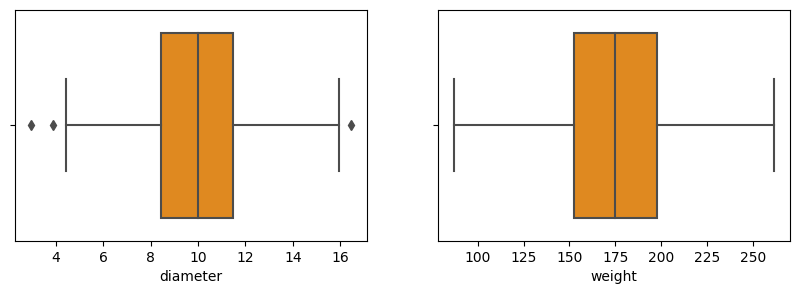

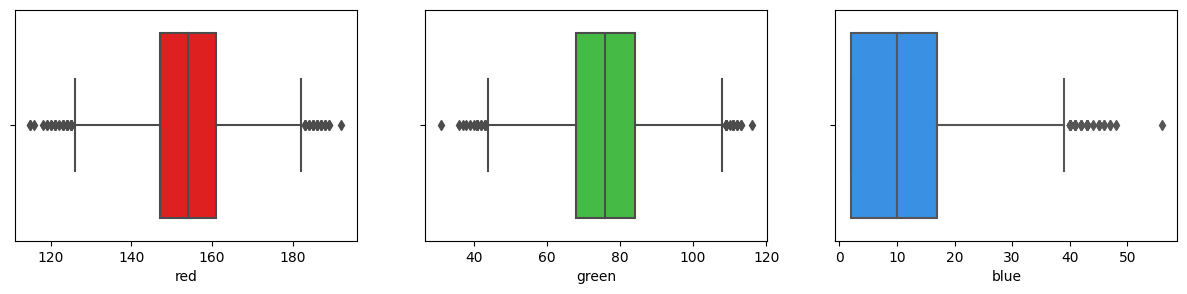

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
sns.boxplot(df, x='diameter', color='darkorange', ax=axes[0])
sns.boxplot(df, x='weight', color='darkorange',ax=axes[1])

fig, axes = plt.subplots(1, 3, figsize=(15,3))
sns.boxplot(df, x='red', color='red', ax=axes[0])
sns.boxplot(df, x='green', color='limegreen',ax=axes[1])
sns.boxplot(df, x='blue', color='dodgerblue',ax=axes[2])

Only weight variable doesn't have any outliers. When it comes to diameter, there are only three outliers. However, for color variables there are plenty of them. Due to a fact that blue participation is very low in majority of fruits, the outliers lie only on the right side of the rest of the data. It means that if some fruit is considered as an outlier in the meaning of blue color, this fruit has too much blue color.

Let's drop the outliers.


In [13]:

col = ['diameter', 'weight', 'red', 'green', 'blue']
Q1 = df[col].quantile(.25)
Q3 = df[col].quantile(.75)
IQR = Q3 - Q1
df = df[~((df[col]< (Q1-1.5*IQR)) | (df[col]> (Q3+1.5*IQR))).any(axis=1)]

number_of_outliers = 10000 - len(df.index)
number_of_outliers

132

There were 132 outliers in the dataset. Let's analyze the correlation between independent variables.

<Axes: >

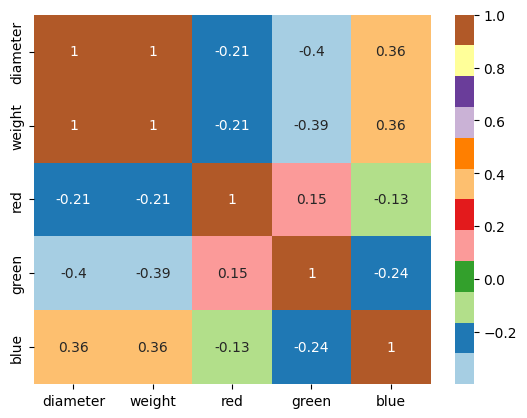

In [14]:
X = df[['diameter', 'weight', 'red', 'green', 'blue']]
Y = df[['name']]
sns.heatmap(X.corr(), cmap="Paired", annot=True)

As mentioned earlier, diameter and weight are perfectly correlated. It sounds reasonable. 
What's more, presence of the red color implies occurrence of green color. And inversely, presence of the green color implies occurrence of red color. 
However, the more red and green is in the fruit, the less blue color occurs in it. And inversely, the more blue, the less red and green. Blue color shows a slight negative correlation with the green color (at the level of -0.24).
There is a small, but noticeable positive correlation between blue color and weight/diameter. It can confirm the previous thoughts about grapefruits as fruits, which in general are bigger (heavier) and contain more blue color than oranges. Negative correlation between green color and weight (diameter) is a consequence of the above conclusions and the transitivity of implications.

<a class="anchor"  id="chapter4"></a>
# IV. Building the models 

Because of the fact, that weight and diameter are correlated, the weight variable won't be used in projecting models.

At the beginning, we split data into train and test sets. The models will be trained on 90% of the data. 

In the next step we proceed feature scaling.




In [15]:
x_train, x_test, y_train, y_test = train_test_split(X[['diameter', 'red', 'green', 'blue']],
                                                    Y,test_size=0.1 ,random_state=0)

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform (x_test)

In some models I will perform grid search to find the best hyperparameters. Accuracy of every model will be judged using cross validation (with 5 fold).

<a class="anchor"  id="sec4_0"></a>
## 0. Naive Bayes 

At the beginning, let's see the performance of this basic model. Results obtained there, will be used as a benchmark.

This model requires an assumption that all the features are independent.

In [16]:
model0 = GaussianNB()
model0.fit(x_train_sc, y_train)
scores0 = cross_val_score(model0, x_train_sc, y_train, cv=5)
result0 = scores0.mean()
scores0


array([0.93472144, 0.9268018 , 0.92905405, 0.91891892, 0.92398649])

We've got quite high accuracy.

<a class="anchor"  id="sec4_1"></a>
## 1. Logistic Regression 

Before we build the model, let's see if all the assumptions of logistic regression are fulfilled.

<b>A. Dependent variable is binary and ordinal</b><br>
Response variable can be only orange or grapefruit.

<b>B. Independent observations</b><br>
Every row in the dataset represents a different fruit, so there are no repeated measurements of the same fruit.


<b>C. No multicollinearity among the predictors</b><br>
In the heatmap we can see that only weight and diameter are correlated to each other, that's why weight variable was excluded. Correlation of the other variables is unimportant.

<b>D. No extreme outliers</b><br>
After analyzing the boxplots, it turned out that the original dataset has some outliers. After that they were excluded.

<b>E. Linear relationship between predictor and logit of target</b><br>
To keep this notebook short, this step will be skipped. It can be proved using Box-Tidwell test.


<b>F. Suitable sample size</b><br>
Dataset contains almost 10000 samples. It's enough for our purposes. 


By grid search we choose the best regularization and solver parameter.

In [17]:
parameters1 = {'penalty':('l1', 'l2', 'elasticnet'),
               'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')}
grid1 = GridSearchCV(LogisticRegression(random_state=0), parameters1)
grid1.fit(x_train_sc, y_train)
grid1.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [18]:
model1 = LogisticRegression(penalty='l2', solver='lbfgs')
model1.fit(x_train_sc, y_train)

LogisticRegression()

In [19]:
model1.coef_

array([[-3.81447854,  0.62146424,  1.33150748, -1.11884741]])

In [20]:
scores1 = cross_val_score(model1, x_train_sc, y_train, cv=5)
result1 = scores1.mean()
scores1

array([0.93415869, 0.92792793, 0.93524775, 0.92511261, 0.9222973 ])

The values of accuracy are very similar to naive Bayes. Looking at coefficients, we can conclude that size of the fruit is the most important variable for prediction. 

<a class="anchor"  id="sec4_2"></a>
## 2. Support Vector Machines 

This algorithm searches for a hyperplane to divide two groups of points.

In [21]:
parameters2 = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
               'gamma': ('scale', 'auto')}
grid2 = GridSearchCV(SVC(random_state=0), parameters2)
grid2.fit(x_train_sc, y_train)
grid2.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [22]:
model2 = SVC(kernel='linear', gamma='scale')
model2.fit(x_train_sc, y_train)

SVC(kernel='linear')

In [23]:
model2.coef_

array([[-2.38259793,  0.40476943,  0.82386763, -0.70094333]])

In [24]:
scores2 = cross_val_score(model2, x_train_sc, y_train, cv=5)
result2 = scores2.mean()
scores2

array([0.93472144, 0.92905405, 0.93524775, 0.92398649, 0.92342342])

The results are also good, but in this case grid search takes some time.

<a class="anchor"  id="sec4_3"></a>
## 3. Linear SVC 

Let's check another, faster implementation of Support Vector Machines Classifier.

In [25]:
parameters3 = {'penalty':('l1', 'l2'),
               'loss': ('hinge', 'squared_hinge')}
grid3 = GridSearchCV(LinearSVC(random_state=0), parameters3)
grid3.fit(x_train_sc, y_train)
grid3.best_params_

{'loss': 'hinge', 'penalty': 'l2'}

In [26]:
model3 = LinearSVC(penalty='l2', loss='hinge')
model3.fit(x_train_sc, y_train)

LinearSVC(loss='hinge')

In [27]:
model3.coef_

array([[-2.38154437,  0.40322376,  0.82352832, -0.70047943]])

In [28]:
scores3 = cross_val_score(model3, x_train_sc, y_train, cv=5)
result3 = scores3.mean()
scores3

array([0.93415869, 0.92905405, 0.93524775, 0.92398649, 0.92342342])

This model is much more time efficient than normal SVM.

<a class="anchor"  id="sec4_4"></a>
## 4. Stochastic Gradient Descent 

The goal of performing grid search, among others, is to find loss function. I will exclude 'hinge', 'log_loss' and 'squared_hinge', because these correspond to the models I've already analyzed.


In [29]:
parameters4 = {'loss': ('modified_huber', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'),
            'penalty':('l2', 'l1', 'elasticnet'),
            'alpha': (.1, .01, .001, .0001, 0.00001)}
grid4 = GridSearchCV(SGDClassifier(random_state=0), parameters4)
grid4.fit(x_train_sc, y_train)
grid4.best_params_

{'alpha': 0.001, 'loss': 'epsilon_insensitive', 'penalty': 'l2'}

In [30]:
model4 = SGDClassifier(loss='epsilon_insensitive', penalty='l2', alpha=.001)
model4.fit(x_train_sc, y_train)

SGDClassifier(alpha=0.001, loss='epsilon_insensitive')

In [31]:
scores4 = cross_val_score(model4, x_train_sc, y_train, cv=5)
result4 = scores4.mean()
scores4

array([0.92684299, 0.92905405, 0.92286036, 0.91779279, 0.92398649])

<a class="anchor"  id="sec4_5"></a>
## 5. K-Nearest Neighbours 

We need to choose appropriate k value. It will be done using grid search.

In [32]:
parameters5 = {'n_neighbors': (3, 5, 10, 50, 100, 1000),
            'weights':('uniform', 'distance')}
grid5 = GridSearchCV(KNeighborsClassifier(), parameters5)
grid5.fit(x_train_sc, y_train)
grid5.best_params_

{'n_neighbors': 50, 'weights': 'uniform'}

In [33]:
model5 = KNeighborsClassifier(n_neighbors=50)
model5.fit(x_train_sc, y_train)

KNeighborsClassifier(n_neighbors=50)

In [34]:
scores5 = cross_val_score(model5, x_train_sc, y_train, cv=5)
result5 = scores5.mean()
scores5

array([0.93134496, 0.9268018 , 0.93412162, 0.9222973 , 0.92736486])

<a class="anchor"  id="sec4_6"></a>
## 6. Decision Tree

I won't use scaled data for this model to make a graph at the end more meaningful and easy to interpret.



In [35]:
parameters6 = {'criterion': ('gini', 'entropy', 'log_loss'),
            'splitter':('best', 'random'), 
            'max_depth': (2, 3, 4, 5)}
grid6 = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters6)
grid6.fit(x_train, y_train)
grid6.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [36]:
model6 = DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='best')
model6.fit(x_train, y_train)
scores6 = cross_val_score(model6, x_train, y_train, cv=5)
result6 = scores6.mean()
scores6

array([0.91446258, 0.9161036 , 0.92060811, 0.91216216, 0.9115991 ])

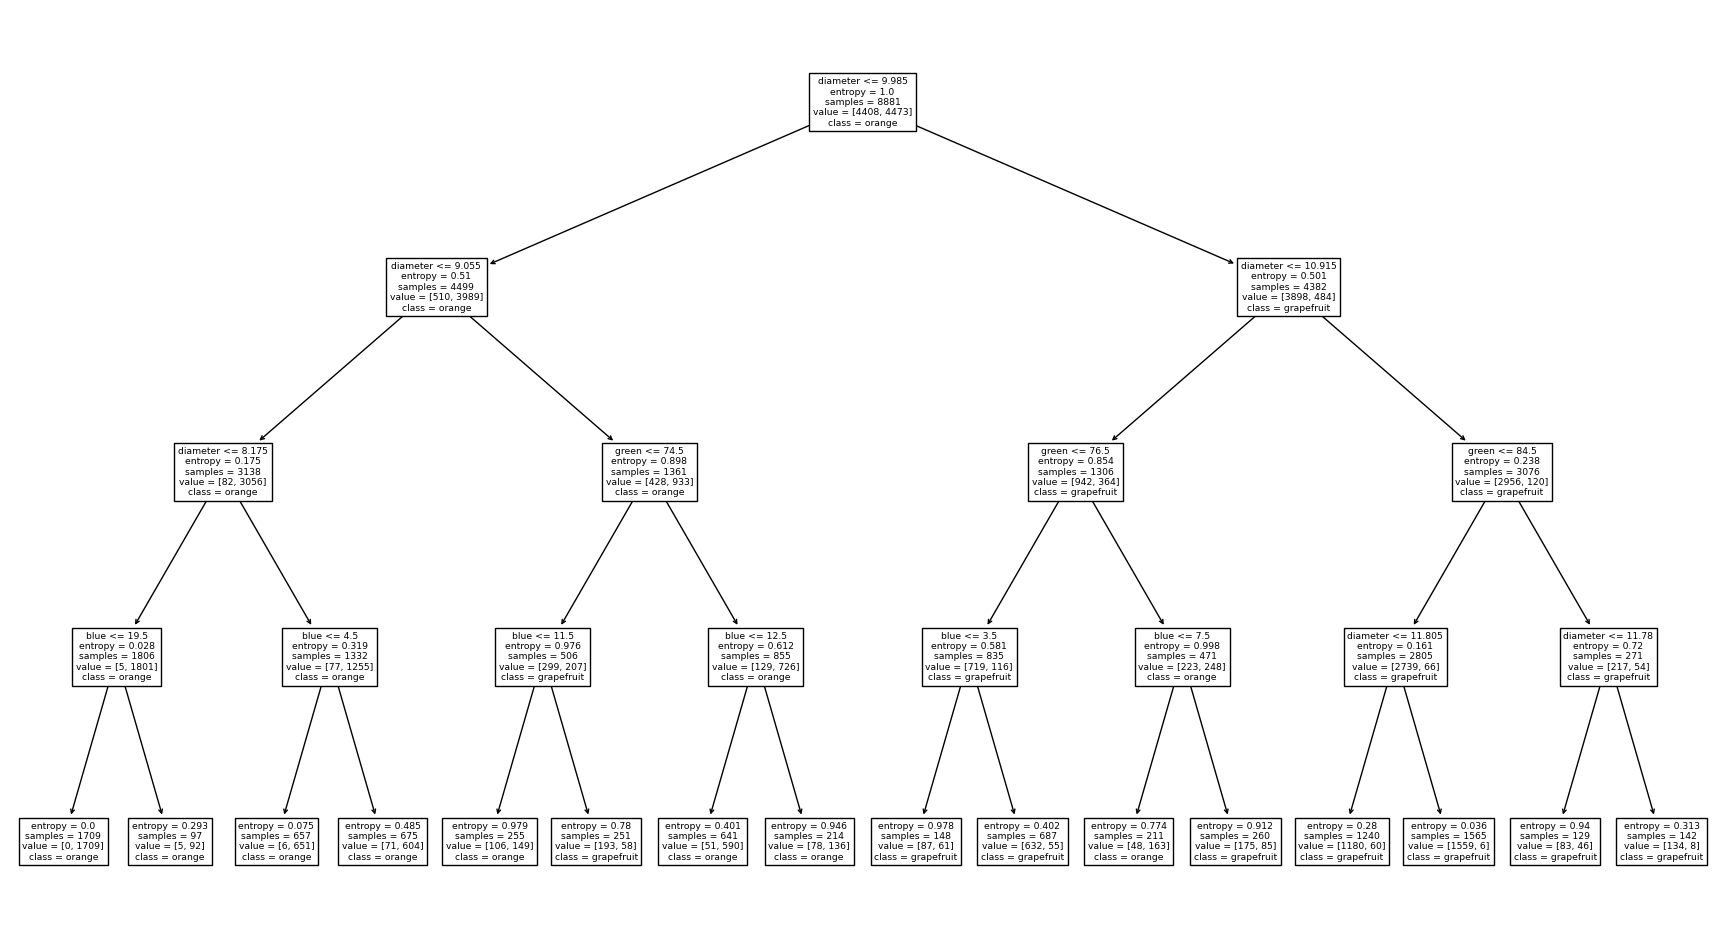

In [37]:
plt.figure(figsize=(22,12))
tree.plot_tree(model6, feature_names=['diameter', 'red', 'green', 'blue'], class_names=['grapefruit', 'orange'])
plt.show()

It's worth to mention that the vast majority of division is based on diameter and blue variables.

<a class="anchor"  id="sec4_7"></a>
## 7. Random Forest

This method is based on averaging multiple decision trees. These trees will be trained on different parts of the training set. The forest will contain 100 trees.

In [38]:
model7 = RandomForestClassifier(max_depth=5)
model7.fit(x_train_sc, y_train)
scores7 = cross_val_score(model7, x_train_sc, y_train, cv=5)
result7 = scores7.mean()
scores7

array([0.92065279, 0.92511261, 0.92849099, 0.91666667, 0.91948198])

As the model needs to create 100 trees, it takes some time. 
Despite that, the values of accuracy are similar to previous much faster models.

<a class="anchor"  id="sec4_8"></a>
## 8. Gradient Boost

Ensemble, additive model, which updates the weights of the falsely classified observations. 

In [39]:
model8 = GradientBoostingClassifier()
model8.fit(x_train_sc, y_train)
scores8 = cross_val_score(model8, x_train_sc, y_train, cv=5)
result8 = scores8.mean()
scores8

array([0.93078222, 0.92342342, 0.92905405, 0.92173423, 0.92454955])

<a class="anchor"  id="sec4_9"></a>
## Models summary 

To compare the models above, I will present the table with maximal, minimal and mean accuracy of every model gained during the cross-validation process.

In [40]:

d = {'Model':
    ['Naive Bayes',
    'Logistic Regression',
    'Support Vector Machines',
    'Linear Support Vector Machines',
    'Stochastic Gradient Descent',
    'K-Nearest Neighbours',
    'Decision Tree', 
    'Random Forest',
    'Gradient Boost'], 
    
    'Max accuracy':
    [scores0.max(),
    scores1.max(),
    scores2.max(),
    scores3.max(),
    scores4.max(),
    scores5.max(),
    scores6.max(),
    scores7.max(),
    scores8.max()],
    
    'Mean accuracy':
    [result0,
    result1,
    result2,
    result3,
    result4,
    result5,
    result6,
    result7,
    result8],
    
    'Min accuracy':
    [scores0.min(),
    scores1.min(),
    scores2.min(),
    scores3.min(),
    scores4.min(),
    scores5.min(),
    scores6.min(),
    scores7.min(),
    scores8.min()],}

results = pd.DataFrame(d, index=[0,1,2,3,4,5,6,7,8])
results

,Model,Max accuracy,Mean accuracy,Min accuracy
0,Naive Bayes,0.934721,0.926697,0.918919
1,Logistic Regression,0.935248,0.928949,0.922297
2,Support Vector Machines,0.935248,0.929287,0.923423
3,Linear Support Vector Machines,0.935248,0.929174,0.923423
4,Stochastic Gradient Descent,0.929054,0.924107,0.917793
5,K-Nearest Neighbours,0.934122,0.928386,0.922297
6,Decision Tree,0.920608,0.914987,0.911599
7,Random Forest,0.928491,0.922081,0.916667
8,Gradient Boost,0.930782,0.925909,0.921734


The main conclusion from the dataframe above is that all the models cope well with classification task.
There are still some differences in accuracy gained by these models, but they are very small. The best result differs from the worst one by ca. 2%.

Naive Bayes got quite good results. More sophisticated methods like Decision Tree, Random Forest or Gradient Boost don't bring special benefits. That's why using these models can be considered unnecessary.

Normal SVM is much slower comparing to faster implementation of SVM (Linear SVM). The values of accuracy of these two models are nearly identical.

In my opinion, for the classification task mentioned in this notebook, logistic regression and Linear SVM will be of the best choice. That's why I will present these two models in the final report.

<a class="anchor"  id="chapter5"></a>
# V. Final Report 

## Logistic Regression

              precision    recall  f1-score   support

  grapefruit     0.9237    0.9291    0.9264       508
      orange     0.9244    0.9186    0.9215       479

    accuracy                         0.9240       987
   macro avg     0.9240    0.9239    0.9239       987
weighted avg     0.9240    0.9240    0.9240       987



<Axes: >

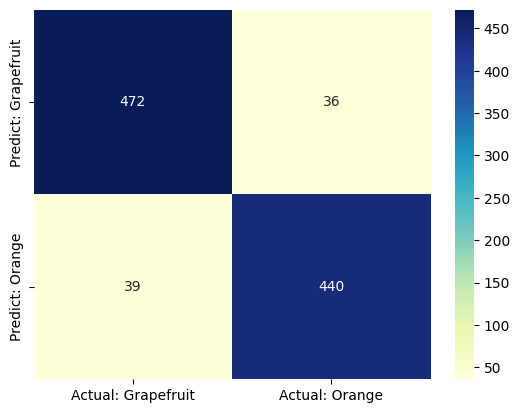

In [41]:
print(classification_report(y_test, model1.predict(x_test_sc), digits=4))

cm1 = confusion_matrix(y_test, model1.predict(x_test_sc))
cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual: Grapefruit', 'Actual: Orange'], 
                        index=['Predict: Grapefruit', 'Predict: Orange'])
sns.heatmap(cm_matrix1, annot=True, fmt='d', cmap='YlGnBu')

## Linear Support Vector Machines

              precision    recall  f1-score   support

  grapefruit     0.9237    0.9291    0.9264       508
      orange     0.9244    0.9186    0.9215       479

    accuracy                         0.9240       987
   macro avg     0.9240    0.9239    0.9239       987
weighted avg     0.9240    0.9240    0.9240       987



<Axes: >

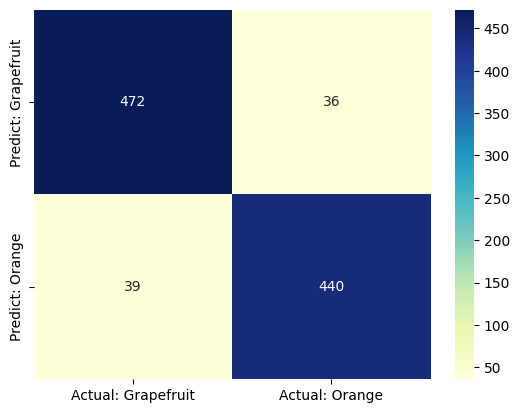

In [42]:
print(classification_report(y_test, model3.predict(x_test_sc), digits=4))

cm2 = confusion_matrix(y_test, model3.predict(x_test_sc))
cm_matrix2 = pd.DataFrame(data=cm2, columns=['Actual: Grapefruit', 'Actual: Orange'], 
                        index=['Predict: Grapefruit', 'Predict: Orange'])
sns.heatmap(cm_matrix2, annot=True, fmt='d', cmap='YlGnBu')

<a class="anchor"  id="chapter6"></a>
# Supplement

What's worth noting, the statistics  of these two models are the same.
Let's check how the errors are distributed in both models.

In [43]:
mispredictions1=[]
predictions = model1.predict(x_test_sc)
for input, prediction, label in zip(x_test_sc, predictions, y_test.values):
  if prediction != label:
    mispredictions1.append(input)
    
mispredictions2=[]
predictions = model3.predict(x_test_sc)
for input, prediction, label in zip(x_test_sc, predictions, y_test.values):
  if prediction != label:
    mispredictions2.append(input)
    
len(mispredictions1), len(mispredictions2)

(75, 75)

In [44]:
differences=0
for i in range(len(mispredictions1)):
    for j in range(4):
        if mispredictions1[i][j]!=mispredictions2[i][j]:
            diff+=1
differences    

0

Both models are incorrect 75 times on the test set. What's interesting, the error occurred in exactly the same inputs.

Another interesting research task would be to analyze these incorrectly classified inputs and try to build the models, which will be free from the current imperfections.